<a href="https://colab.research.google.com/github/Latamila/Latamila/blob/main/deploy_cyberphishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.16


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00


In [3]:
# Imports

# Manipulação de dados
import numpy as np 
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pré-processamento de dados
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Machine Learning
from sklearn.linear_model import LogisticRegression

# Métricas e Relatórios
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

sklearn   : 1.2.2
numpy     : 1.22.4
pandas    : 1.4.4
mlxtend   : 0.14.0
matplotlib: 3.7.1
seaborn   : 0.12.2



In [5]:
from google.colab import files 

In [8]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [10]:
# Carrega o dataset
dados = pd.read_csv('dataset.csv', header = 0)

In [11]:
# Shape
dados.shape

(10000, 32)

In [12]:
# Amostra dos dados (5 primeiras linhas)
dados.head()

,indice,endereco_ip,comprimento_url,servico_encurtamento,simbolo_at,redirecionamento_double_slash,prefixo_sufixo,sub_dominio,certificado_ssl,comprimento_dominio,...,pop_up_window,iframe,idade_dominio,registro_dns,trafego_web,page_rank,indice_google,links_apontando_pagina,relatorio_estatistico,resultado
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [13]:
# A coluna de índice não é necessária. Vamos removê-la.
del dados['indice']

In [14]:
# Vamos remover os valores duplicados.
dados.drop_duplicates(keep = 'first', inplace = True)

In [15]:
# A variável favicon tem alta correlação com outras duas e pode ser removida.
del dados['favicon']

In [16]:
# Removemos ainda a variável redirecionamento_double_slash
del dados['redirecionamento_double_slash']

In [17]:
# Vamos dividir x e y
X = dados.iloc[:,0:28].values

In [18]:
y = dados.iloc[:,28].values

In [19]:
X.shape

(5389, 28)

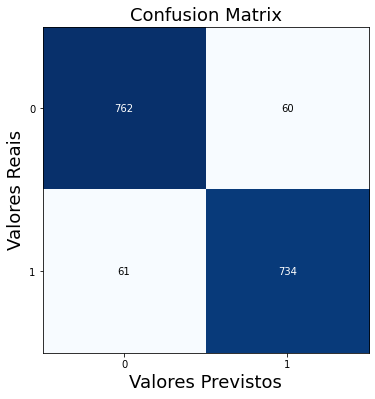

Acurácia da Versão Final do Modelo: 0.9251700680272109


In [20]:
# Recria os datasets de treino e teste (observe a mudança de proporção)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 7)  

# Modelo PCA
modelo_pca = PCA(n_components = 26)

# Fit e Transform em Treino
X_treino_final = modelo_pca.fit_transform(X_treino)  

# Transform em Teste
X_teste_final = modelo_pca.transform(X_teste) 

# Cria o modelo
modelo_versao_final = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'newton-cg')

# Treina o modelo
modelo_versao_final.fit(X_treino_final, y_treino)

# Previsões
y_pred_final = modelo_versao_final.predict(X_teste_final)  

# Matriz de confusão
cm = confusion_matrix(y_teste, y_pred_final)  
 
# Plot
fig, ax = plot_confusion_matrix(conf_mat = cm, figsize = (8, 6), cmap = plt.cm.Blues)
plt.xlabel('Valores Previstos', fontsize = 18)
plt.ylabel('Valores Reais', fontsize = 18)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()
print('Acurácia da Versão Final do Modelo:', metrics.accuracy_score(y_teste, y_pred_final))

In [21]:
print(classification_report(y_teste, y_pred_final))

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93       822
           1       0.92      0.92      0.92       795

    accuracy                           0.93      1617
   macro avg       0.93      0.93      0.93      1617
weighted avg       0.93      0.93      0.93      1617



Salvando o Modelo em Disco Para o Deploy

In [22]:
# Pacote joblib para salvar o modelo
from joblib import dump, load

In [23]:
# Dump do modelo PCA
dump(modelo_pca, 'modelo_pca.joblib') 

['modelo_pca.joblib']

In [24]:
# Dump do modelo de classificação
dump(modelo_versao_final, 'modelo_versao_final.joblib') 

['modelo_versao_final.joblib']

In [25]:
# Versões dos pacotes usados neste colab notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

sklearn   : 1.2.2
numpy     : 1.22.4
pandas    : 1.4.4
google    : 2.0.3
mlxtend   : 0.14.0
matplotlib: 3.7.1
seaborn   : 0.12.2



DEPLOY DO MODELO


In [26]:
# Vamos carregar os modelos do disco
modelo_pca_deploy = load('modelo_pca.joblib') 
modelo_classificador_deploy = load('modelo_versao_final.joblib') 

In [27]:
uploaded = files.upload()

Saving novos_dados.csv to novos_dados.csv


In [28]:
# Carregamos o dataset com dados de uma nova url
dados = pd.read_csv('novos_dados.csv', header = 0)

In [29]:
# Temos uma linha e 28 colunas
dados.shape

(1, 28)

In [31]:
# Convertemos o dataframe em array numpy (pois foi com esse formato que treinamso o modelo PCA)
dados_array = dados.to_numpy()

In [32]:
# Aplicamos o PCA exatamente como fizemos nos dados de teste para testar o modelo
dados_array_pca = modelo_pca_deploy.transform(dados_array) 

In [33]:
# Aplicamos o modelo classificador
previsao = modelo_classificador_deploy.predict(dados_array_pca)  

In [34]:
print('Para a URL apresentada o modelo previu a seguinte classe:', previsao)

Para a URL apresentada o modelo previu a seguinte classe: [-1]


Para a URL APRESENTADA é legitima e nao representa ataque de phishing.
